# Sección A

## Datos abiertos de la CDMX

La Agencia Digital de Innovación Pública tiene disponibles datos de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí:
https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f

Utilizando estos datos, responde las siguientes preguntas:

1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una.

+ revisar valores faltantes
+ columnas que aporten poca o nula informacion
+ revisar y ajustar los tipos de datos para cada variable de informacion

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import eda

#os.chdir("../..")
#os.chdir("src/utils")

In [2]:
file = 'data/carpetas_completa_febrero_2022.csv'
data = pd.read_csv(file, sep=',', error_bad_lines=False, index_col=False, dtype='unicode',header=0)

/tmp/ipykernel_387/1307270414.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file, sep=',', error_bad_lines=False, index_col=False, dtype='unicode',header=0)


Al 12 de abril de 2022 antes de limpiar tenemos

In [3]:
data.dataframeName = 'Carpetas_inv.csv'
nRow, nCol = data.shape
print(f'Tenemos {nRow} renglones y {nCol} columnas')

Tenemos 1401331 renglones y 19 columnas


In [4]:
data.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.1402149999999,19.3803149998337,NaN
1,2016,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.1084029999999,19.3528589998337,NaN
2,2016,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.3564509998336,NaN
3,2016,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.9763790000001,19.3316329998333,NaN
4,2015,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.1721889999999,19.387113999834,NaN


In [5]:
data.isnull().sum()

ao_hechos                   458
mes_hechos                  458
fecha_hechos                458
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  3
delito                        0
fiscalia                      2
agencia                       0
unidad_investigacion        227
categoria_delito              0
calle_hechos               3941
calle_hechos2            861334
colonia_hechos            60338
alcaldia_hechos            4165
competencia             1064079
longitud                  59390
latitud                   59390
tempo                   1401331
dtype: int64

In [6]:
data.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'calle_hechos2', 'colonia_hechos',
       'alcaldia_hechos', 'competencia', 'longitud', 'latitud', 'tempo'],
      dtype='object')

In [7]:
data.dtypes

ao_hechos               object
mes_hechos              object
fecha_hechos            object
ao_inicio               object
mes_inicio              object
fecha_inicio            object
delito                  object
fiscalia                object
agencia                 object
unidad_investigacion    object
categoria_delito        object
calle_hechos            object
calle_hechos2           object
colonia_hechos          object
alcaldia_hechos         object
competencia             object
longitud                object
latitud                 object
tempo                   object
dtype: object

In [8]:
data = data[data['ao_hechos'].notna()]
data = data[data['mes_hechos'].notna()]
data = data[data['fecha_inicio'].notna()]
data = data[data['fiscalia'].notna()]
data = data[data['unidad_investigacion'].notna()]
data = data[data['longitud'].notna()]
data = data[data['latitud'].notna()]

data = data.astype({"ao_hechos":'int64',
                   "mes_hechos":'category',
                   "ao_inicio": 'int64',
                   "longitud":'float64',
                   "latitud":'float64',
                   })

data['fecha_hechos'] = pd.to_datetime(data['fecha_hechos'], dayfirst=True)
data['fecha_inicio'] = pd.to_datetime(data['fecha_inicio'], dayfirst=True)

In [9]:
data.isnull().sum()

ao_hechos                     0
mes_hechos                    0
fecha_hechos                  0
ao_inicio                     0
mes_inicio                    0
fecha_inicio                  0
delito                        0
fiscalia                      0
agencia                       0
unidad_investigacion          0
categoria_delito              0
calle_hechos               2024
calle_hechos2            824370
colonia_hechos             1191
alcaldia_hechos               3
competencia             1021421
longitud                      0
latitud                       0
tempo                   1341352
dtype: int64

In [10]:
data.dtypes

ao_hechos                        int64
mes_hechos                    category
fecha_hechos            datetime64[ns]
ao_inicio                        int64
mes_inicio                      object
fecha_inicio            datetime64[ns]
delito                          object
fiscalia                        object
agencia                         object
unidad_investigacion            object
categoria_delito                object
calle_hechos                    object
calle_hechos2                   object
colonia_hechos                  object
alcaldia_hechos                 object
competencia                     object
longitud                       float64
latitud                        float64
tempo                           object
dtype: object

Sin los NaN tenemos:

In [11]:
nRow, nCol = data.shape
print(f'Tenemos {nRow} renglones y {nCol} columnas')

Tenemos 1341352 renglones y 19 columnas


In [12]:
eda.genera_profiling_general(data)

El dataframe tiene 19 columnas.
Hay 6 columnas que tienen NA's.


,Estadísticas,Resultado
0,Total de variables,19
1,Conteo de observaciones,1341352
2,Total de celdas,25485688
3,Cantidad de variables numéricas,4
4,Cantidad de variables de fecha,2
5,Cantidad de variables categóricas,1
6,Cantidad de variables de texto,12
7,Valores faltantes,3190361
8,Porcentaje de valores faltantes,12.5%
9,Renglones duplicados,0


In [13]:
eda.cuenta_nulos_por_columnas(data)

El dataframe tiene 19 columnas.
Hay 6 columnas que tienen NA's.


,Missing Values,% del Total
tempo,1341352,100.0
competencia,1021421,76.1
calle_hechos2,824370,61.5
calle_hechos,2024,0.2
colonia_hechos,1191,0.1
alcaldia_hechos,3,0.0


Podemos eliminar la columna `tempo` y `competencia` ya que en su mayoria son valores nulos.

In [14]:
data.drop(columns =["tempo"], inplace = True)
data.drop(columns =["competencia"], inplace = True)
data.drop(columns =["calle_hechos2"], inplace = True)

In [15]:
profiling_numericas, profiling_categoricas, profiling_texto, profiling_fechas = eda.genera_profiling_por_variable(data)

/datos/Documents/Jobs/opi_dc/eda.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variables_numericas = variables_int.append(variables_float, ignore_index=True)


In [16]:
profiling_categoricas

,Métrica,mes_hechos
0,Tipo,category
1,Número de categorías,12
2,Número de observaciones,1341352
3,Observaciones nulas,0
4,% Observaciones nulas,0.0
5,Valores únicos,"[Enero, Febrero, Diciembre, Agosto, Noviembre,..."
6,Moda1/veces/%,"[Enero, 122,330, 9.12%]"
7,Moda2/veces/%,"[Febrero, 119,145, 8.88%]"
8,Moda3/veces/%,"[Octubre, 117,347, 8.75%]"


In [17]:
profiling_texto

,Métrica,mes_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos
0,Tipo,object,object,object,object,object,object,object,object,object
1,Número de observaciones,1341352,1341352,1341352,1341352,1341352,1341352,1341352,1341352,1341352
2,Observaciones únicas,12,345,73,210,130,17,263584,1639,21
3,% Observaciones únicas,0.000009,0.000257,0.000054,0.000157,0.000097,0.000013,0.196506,0.001222,0.000016
4,Observaciones nulas,0,0,0,0,0,0,2024,1191,3
5,% Observaciones nulas,0.0,0.0,0.0,0.0,0.0,0.0,0.001509,0.000888,0.000002
6,Tamaño promedio,6.414228,29.947568,38.789607,4.62349,7.437837,25.022305,16.916551,15.74466,11.962667
7,Tamaño mínimo,4,4,16,1,5,9,1.0,3.0,6.0
8,Tamaño máximo,10,176,182,10,31,55,188.0,62.0,22.0


In [18]:
profiling_numericas

,Métrica,ao_hechos,ao_inicio,longitud,latitud
0,Tipo,int64,int64,float64,float64
1,Número de observaciones,1341352.0,1341352.0,1341352.0,1341352.0
2,Media,2018.46,2018.61,-99.14,19.39
3,Desviación estándar,2.0,1.73,0.06,0.07
4,Cuartil 25%,2017.0,2017.0,-99.18,19.34
5,Cuartil 50%,2018.0,2019.0,-99.14,19.39
6,Cuartil 75%,2020.0,2020.0,-99.1,19.44
7,Mínimo,1906.0,2016.0,-100.23,19.1
8,Máximo,2022.0,2022.0,-98.95,19.58
9,Número de observaciones únicas,75,7,960445,970046


In [19]:
profiling_fechas

,Métrica,fecha_hechos,fecha_inicio
0,Tipo,datetime64[ns],datetime64[ns]
1,Número de observaciones,1341352,1341352
2,Mínimo,1906-06-02 19:00:00,2016-01-01 01:35:06
3,Máximo,2022-02-28 22:30:00,2022-02-28 23:59:44
4,Número de observaciones únicas,453943,1245794
5,Número de faltantes,0,0
6,Top1/veces/%,"[2017-10-16 12:00:00, 239, 0.02%]","[2018-12-04 13:46:00, 8, 0.0%]"
7,Top2/veces/%,"[2016-01-01 12:00:00, 160, 0.01%]","[2018-09-12 18:00:00, 8, 0.0%]"
8,Top3/veces/%,"[2014-05-30 12:00:00, 149, 0.01%]","[2018-08-31 11:08:00, 7, 0.0%]"


In [20]:
#data.drop(data.loc[data['fecha_hechos'] == '1906-06-02 19:00:00'].index, inplace=True)

2. Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias).

In [21]:
data['mes_hechos'] = data.fecha_hechos.dt.month
data['mes_inicio'] = data.fecha_inicio.dt.month
data['dia_hechos'] = data.fecha_hechos.dt.day
data['dia_inicio'] = data.fecha_inicio.dt.day

In [22]:
data.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud,dia_hechos,dia_inicio
0,2016,1,2016-01-31 22:16:00,2016,2,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315,31,1
1,2016,1,2016-01-31 20:50:00,2016,2,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859,31,1
2,2016,2,2016-02-01 00:30:00,2016,2,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451,1,1
3,2016,1,2016-01-31 22:00:00,2016,2,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,EMILIANO ZAPATA,IZTAPALAPA,-98.976379,19.331633,31,1
4,2015,12,2015-12-25 12:00:00,2016,2,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,DEL VALLE CENTRO,BENITO JUAREZ,-99.172189,19.387114,25,1


In [23]:
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000
    return '%d%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

In [24]:
result = pd.DataFrame(data['categoria_delito'].value_counts())
result = result.rename(columns = {'categoria_delito':'counts'})
result

,counts
DELITO DE BAJO IMPACTO,1066566
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,77124
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,68020
HECHO NO DELICTIVO,52128
ROBO A NEGOCIO CON VIOLENCIA,22108
ROBO A REPARTIDOR CON Y SIN VIOLENCIA,13672
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,11634
HOMICIDIO DOLOSO,6641
VIOLACIÓN,6394
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,4620


In [25]:
data.set_index('fecha_hechos', inplace=True)

In [26]:
anio = data[(data.index >= '2021-01-01') & (data.index <= '2021-12-30')]
anio_grupo = anio.groupby(['mes_hechos','ao_hechos', 'delito'])['delito'].count()

In [27]:
anio_grupo = anio_grupo.unstack()
anio_grupo = anio_grupo.loc[:, ((anio_grupo.isnull().sum(axis=0) <= 1) & (anio_grupo.sum(axis=0) > 24))]
anio_grupo = anio_grupo[12:].append(anio_grupo[:12])

/tmp/ipykernel_387/2606668258.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anio_grupo = anio_grupo[12:].append(anio_grupo[:12])


In [28]:
anio_grupo.iloc[:,:2]

,delito,ABORTO,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA
mes_hechos,ao_hechos,,
1,2021,4.0,146.0
2,2021,5.0,150.0
3,2021,1.0,159.0
4,2021,4.0,141.0
5,2021,6.0,164.0
6,2021,5.0,138.0
7,2021,3.0,154.0
8,2021,3.0,167.0
9,2021,7.0,144.0


In [29]:
alza = anio_grupo.loc[:, (anio_grupo.loc[(1, 2021)] < anio_grupo.loc[(12, 2021)])]
alza = alza.append(pd.Series(alza.apply(lambda x: round((x[(12, 2021)] - x[(1, 2021)])/x[(1, 2021)], 2) * 100).sort_values(ascending=False), name='inc-dec')) 

/tmp/ipykernel_387/1407896307.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alza = alza.append(pd.Series(alza.apply(lambda x: round((x[(12, 2021)] - x[(1, 2021)])/x[(1, 2021)], 2) * 100).sort_values(ascending=False), name='inc-dec'))


In [30]:
anio_grupo.loc[(1, 2021)]

delito
ABORTO                                                     4.0
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA     146.0
ABUSO DE CONFIANZA                                       329.0
ABUSO SEXUAL                                             204.0
ACOSO SEXUAL                                              73.0
                                                         ...  
USURPACIÓN DE IDENTIDAD                                  281.0
VIOLACION                                                 72.0
VIOLACION DE CORRESPONDENCIA                               2.0
VIOLACION EQUIPARADA                                      21.0
VIOLENCIA FAMILIAR                                      2504.0
Name: (1, 2021), Length: 168, dtype: float64

In [31]:
anio_grupo.loc[(12, 2021)]

delito
ABORTO                                                     3.0
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA      97.0
ABUSO DE CONFIANZA                                       223.0
ABUSO SEXUAL                                             215.0
ACOSO SEXUAL                                              81.0
                                                         ...  
USURPACIÓN DE IDENTIDAD                                  274.0
VIOLACION                                                 45.0
VIOLACION DE CORRESPONDENCIA                               4.0
VIOLACION EQUIPARADA                                      48.0
VIOLENCIA FAMILIAR                                      2563.0
Name: (12, 2021), Length: 168, dtype: float64

In [32]:
anio_grupo.loc[:, (anio_grupo.loc[(1, 2021)] > anio_grupo.loc[(12, 2021)])].T

mes_hechos,1,2,3,4,5,6,7,8,9,10,11,12
ao_hechos,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
delito,,,,,,,,,,,,
ABORTO,4.0,5.0,1.0,4.0,6.0,5.0,3.0,3.0,7.0,4.0,4.0,3.0
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,146.0,150.0,159.0,141.0,164.0,138.0,154.0,167.0,144.0,141.0,105.0,97.0
ABUSO DE CONFIANZA,329.0,282.0,311.0,293.0,349.0,316.0,313.0,302.0,260.0,271.0,276.0,223.0
"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",54.0,89.0,75.0,85.0,91.0,70.0,91.0,59.0,78.0,70.0,77.0,51.0
AMENAZAS,1198.0,1271.0,1584.0,1452.0,1623.0,1362.0,1336.0,1295.0,1352.0,1398.0,1260.0,1191.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TRATA DE PERSONAS,5.0,3.0,2.0,11.0,8.0,4.0,6.0,7.0,NaN,2.0,1.0,3.0
USO DE DOCUMENTO FALSO,10.0,3.0,8.0,8.0,11.0,5.0,11.0,10.0,12.0,9.0,13.0,5.0


In [33]:
baja = anio_grupo.loc[:, (anio_grupo.loc[(1, 2021)] > anio_grupo.loc[(12, 2021)])]
baja = baja.append(pd.Series(baja.apply(lambda x: round((x[(1, 2021)] - x[(12, 2021)])/x[(12, 2021)], 2) * 100).sort_values(ascending=False), name='inc-dec')) 

/tmp/ipykernel_387/1698790993.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baja = baja.append(pd.Series(baja.apply(lambda x: round((x[(1, 2021)] - x[(12, 2021)])/x[(12, 2021)], 2) * 100).sort_values(ascending=False), name='inc-dec'))


In [34]:
baja.T.sort_values(by='inc-dec', ascending = True).T

delito,AMENAZAS,HOMICIDIO POR ARMA DE FUEGO,ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA,USURPACIÓN DE IDENTIDAD,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",ROBO A CASA HABITACION SIN VIOLENCIA,DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES,COHECHO,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLISION),PRIVACION DE LA LIBERTAD PERSONAL,...,PORTACION DE ARMA DE FUEGO,PERDIDA DE LA VIDA POR ENFERMEDAD,DDH CERESO,TORTURA,ROBO DE VEHICULO DE SERVICIO PÚBLICO CON VIOLENCIA,HOMICIDIOS INTENCIONALES (OTROS),"DAÑO SUELO (ACTIVIDAD, INVASIÓN O EXTRACCIÓN)",ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA),DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION
"(1, 2021)",1198.0,45.0,32.0,281.0,54.0,274.0,51.0,11.0,23.0,42.0,...,30.0,19.0,4.0,4.0,33.0,5.0,6.0,7.0,49.0,15.0
"(2, 2021)",1271.0,47.0,25.0,225.0,89.0,225.0,56.0,15.0,31.0,44.0,...,23.0,15.0,9.0,7.0,34.0,3.0,7.0,8.0,16.0,31.0
"(3, 2021)",1584.0,45.0,22.0,291.0,75.0,317.0,71.0,26.0,19.0,42.0,...,13.0,14.0,7.0,8.0,25.0,5.0,18.0,6.0,17.0,21.0
"(4, 2021)",1452.0,45.0,27.0,316.0,85.0,279.0,71.0,17.0,17.0,55.0,...,16.0,11.0,4.0,10.0,36.0,5.0,11.0,7.0,15.0,47.0
"(5, 2021)",1623.0,62.0,24.0,283.0,91.0,265.0,56.0,21.0,21.0,44.0,...,16.0,11.0,5.0,6.0,28.0,10.0,9.0,2.0,17.0,16.0
"(6, 2021)",1362.0,40.0,28.0,274.0,70.0,258.0,47.0,20.0,20.0,40.0,...,20.0,11.0,3.0,9.0,35.0,3.0,7.0,4.0,7.0,25.0
"(7, 2021)",1336.0,53.0,34.0,318.0,91.0,262.0,55.0,18.0,18.0,40.0,...,22.0,10.0,6.0,10.0,22.0,8.0,6.0,2.0,9.0,24.0
"(8, 2021)",1295.0,48.0,19.0,298.0,59.0,243.0,46.0,28.0,20.0,52.0,...,26.0,8.0,7.0,7.0,23.0,4.0,6.0,4.0,13.0,25.0
"(9, 2021)",1352.0,48.0,35.0,269.0,78.0,227.0,63.0,19.0,18.0,33.0,...,13.0,9.0,5.0,6.0,27.0,3.0,4.0,1.0,20.0,21.0
"(10, 2021)",1398.0,43.0,30.0,308.0,70.0,245.0,54.0,22.0,18.0,43.0,...,NaN,5.0,4.0,5.0,11.0,4.0,4.0,2.0,17.0,40.0


Text(0, 0.5, 'baja %')

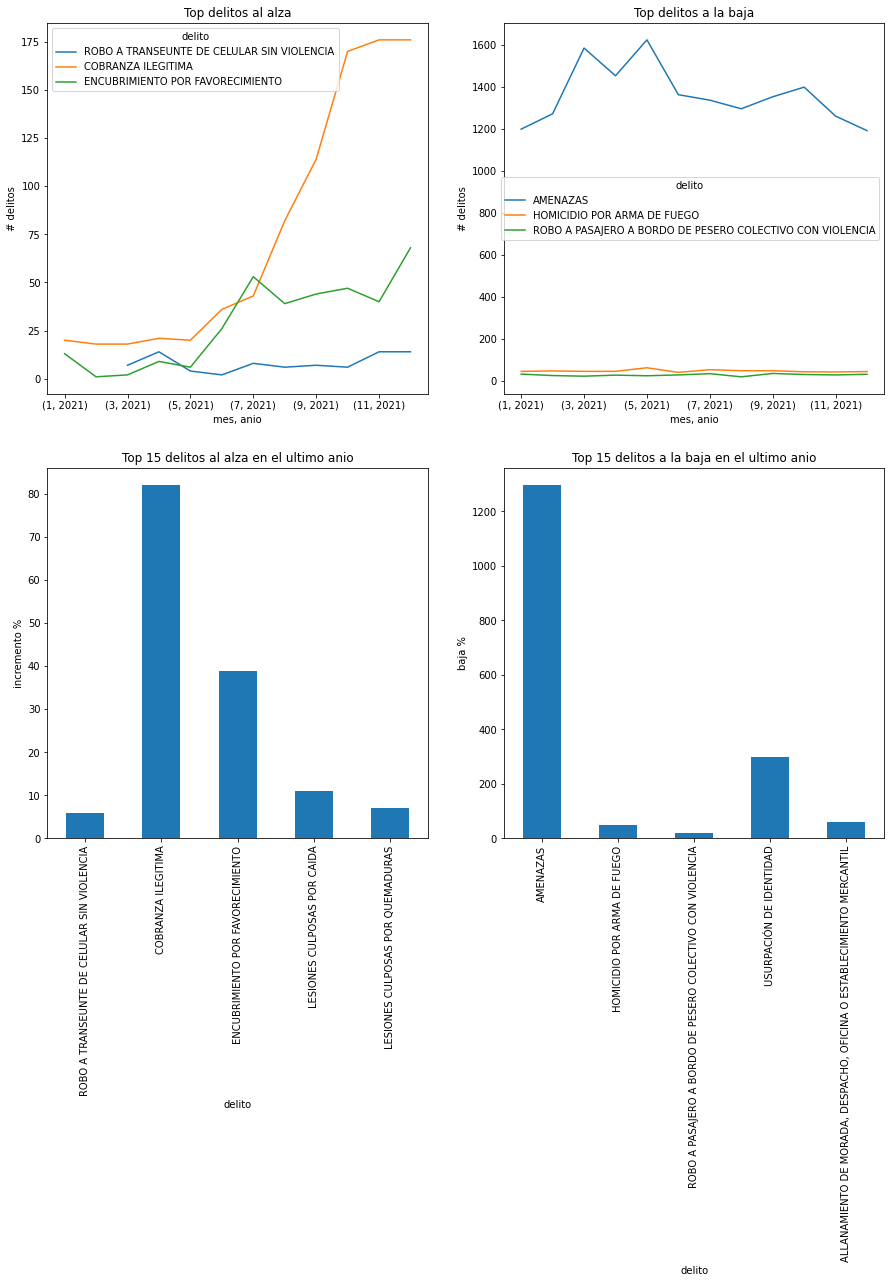

In [35]:
#Set 4 figures to plot on, one aside the other
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2,figsize=(15,15))

#alza
alza_sorted = alza.T.sort_values(by='inc-dec', ascending = False).T
#delitos al alza
k = 3
_plot2 = alza_sorted.iloc[:12,:k].plot( title = 'Top delitos al alza', ax = ax1)
_plot2.set_xlabel('mes, anio')
_plot2.set_ylabel('# delitos')

 
baja_sorted = baja.T.sort_values(by='inc-dec', ascending = True).T
#delitos a la baja
_plot2 = baja_sorted.iloc[:12,:k].plot(title = 'Top delitos a la baja', ax = ax2)
_plot2.set_xlabel('mes, anio')
_plot2.set_ylabel('# delitos')

#ordenando al alza
_plot2 = alza_sorted.iloc[7,:5].plot(kind='bar', title= 'Top 15 delitos al alza en el ultimo anio', ax=ax3)
_plot2.set_ylabel('incremento %')

#ordenando a la baja
_plot2 = baja_sorted.iloc[7,:5].plot(kind='bar', title= 'Top 15 delitos a la baja en el ultimo anio', ax=ax4)
_plot2.set_ylabel('baja %')

3. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea esto?

In [36]:
result = pd.DataFrame(data['alcaldia_hechos'].value_counts())
result = result.rename(columns = {'alcaldia_hechos':'counts'})
result

,counts
CUAUHTEMOC,204687
IZTAPALAPA,200163
GUSTAVO A MADERO,136514
BENITO JUAREZ,112289
ALVARO OBREGON,92480
COYOACAN,92106
MIGUEL HIDALGO,88419
TLALPAN,80734
VENUSTIANO CARRANZA,77783
AZCAPOTZALCO,67450


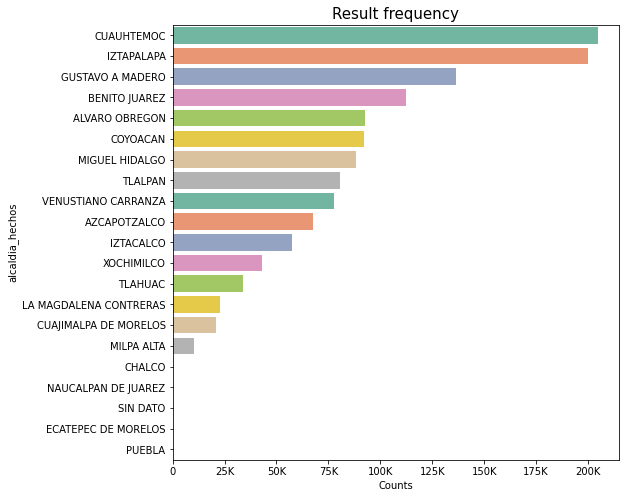

In [37]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8,8)) 
ax = sns.barplot(x="counts", 
                 y=result.index, 
                 data=result,
                 order=result.index,
                 palette="Set2") 
ax.set(xlabel='Counts',
       ylabel='alcaldia_hechos')
plt.title('Result frequency', size = 15)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.show()

Podemos ver que la alcaldia con mas delitos es la Cuauhtemoc.

4. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?

In [38]:
data.head(5)

,ao_hechos,mes_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud,dia_hechos,dia_inicio
fecha_hechos,,,,,,,,,,,,,,,,,
2016-01-31 22:16:00,2016,1,2016,2,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315,31,1
2016-01-31 20:50:00,2016,1,2016,2,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859,31,1
2016-02-01 00:30:00,2016,2,2016,2,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451,1,1
2016-01-31 22:00:00,2016,1,2016,2,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,EMILIANO ZAPATA,IZTAPALAPA,-98.976379,19.331633,31,1
2015-12-25 12:00:00,2015,12,2016,2,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,DEL VALLE CENTRO,BENITO JUAREZ,-99.172189,19.387114,25,1


<AxesSubplot:xlabel='fecha_inicio'>

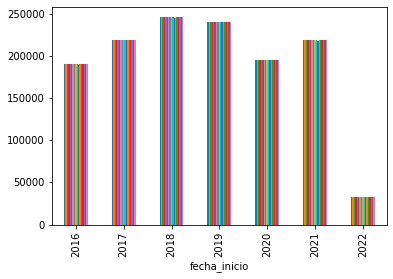

In [39]:
data.groupby(data["fecha_inicio"].dt.year).count().plot(kind="bar", legend=None)

<AxesSubplot:xlabel='fecha_inicio'>

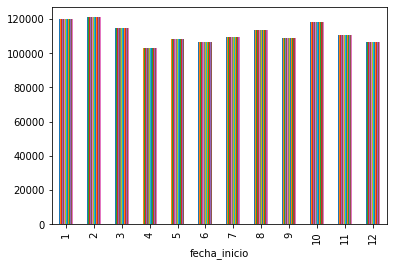

In [40]:
data.groupby(data["fecha_inicio"].dt.month).count().plot(kind="bar", legend=None)

<AxesSubplot:xlabel='fecha_inicio'>

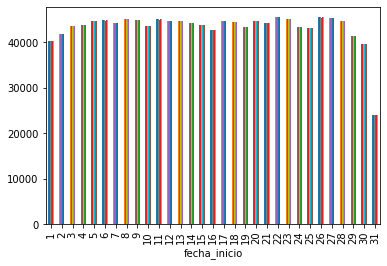

In [41]:
data.groupby(data["fecha_inicio"].dt.day).count().plot(kind="bar", legend=None)

+ Por anio podemos ver que en 2020 hubo una leve disminucion en las denuncias, esto pudo haber sido por efectos de pandemia, sin embargo, en 2021 se nota la recuperacion del mismo.
+ Por mes se puede observar que a principios de anio es cuando tenemos quiza mayores delitos.
+ Por dia al parecer es indistinto.

5. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [42]:
data_freq = pd.DataFrame(data[data['alcaldia_hechos'].apply(lambda x: x not in ['', 'sin informacion'])].groupby(['alcaldia_hechos', 'delito'])['delito'].count())

data_freq.columns = {'count_'}

#Tabla de delitos
new_df = pd.DataFrame({})
# agregando 1 'delito' para cada 'alcaldía'
for alcaldia, subgroup in data_freq.groupby(level=0):
    s = subgroup.count_.sort_values(ascending=False)[:1]
    # agregando a
    new_df = new_df.append({'alcaldia_hechos': s.index[0][0], 
                            'delito': s.index[0][1], 
                            'count_':s[0]}, ignore_index=True)

    
new_df.reset_index(drop = True, inplace=True)
print('Los delitos mas frecuentes')
new_df.sort_values(by='count_', ascending = False)

/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'alcaldia_hechos': s.index[0][0],
/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'alcaldia_hechos': s.index[0][0],
/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'alcaldia_hechos': s.index[0][0],
/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'alcaldia_hechos': s.index[0][0],
/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is d

Los delitos mas frecuentes


/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'alcaldia_hechos': s.index[0][0],
/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'alcaldia_hechos': s.index[0][0],
/tmp/ipykernel_387/4072887320.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append({'alcaldia_hechos': s.index[0][0],


,alcaldia_hechos,delito,count_
10,IZTAPALAPA,VIOLENCIA FAMILIAR,26797
6,CUAUHTEMOC,FRAUDE,20754
8,GUSTAVO A MADERO,VIOLENCIA FAMILIAR,18021
2,BENITO JUAREZ,FRAUDE,11907
0,ALVARO OBREGON,VIOLENCIA FAMILIAR,11247
18,TLALPAN,VIOLENCIA FAMILIAR,10882
4,COYOACAN,VIOLENCIA FAMILIAR,9922
9,IZTACALCO,VIOLENCIA FAMILIAR,8801
12,MIGUEL HIDALGO,FRAUDE,8460
19,VENUSTIANO CARRANZA,VIOLENCIA FAMILIAR,8358


6. Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?

In [43]:
anio.head(5)

,ao_hechos,mes_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud,dia_hechos,dia_inicio
fecha_hechos,,,,,,,,,,,,,,,,,
2021-01-01 00:15:00,2021,1,2021,1,2021-01-01 00:57:55,VIOLENCIA FAMILIAR,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...,MIL-1,UI-2CD,DELITO DE BAJO IMPACTO,PROLONGACIÓN SINALOA,SANTA MARTHA (VILLA MILPA ALTA),MILPA ALTA,-99.026277,19.198153,1,1
2021-01-01 00:35:00,2021,1,2021,1,2021-01-01 01:21:23,ROBO DE MOTOCICLETA SIN VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,IZC-3,UI-2CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,CANAL DE APATLACO,CARLOS ZAPATA VELA,IZTACALCO,-99.097667,19.379998,1,1
2021-01-01 00:29:00,2021,1,2021,1,2021-01-01 01:23:41,PORTACION DE ARMA DE FUEGO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-2,UI-2CD,DELITO DE BAJO IMPACTO,EZEQUIEL MONTES,TABACALERA,CUAUHTEMOC,-99.155624,19.438573,1,1
2021-01-01 00:55:00,2021,1,2021,1,2021-01-01 01:28:32,VIOLENCIA FAMILIAR,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...,MIL-1,UI-2CD,DELITO DE BAJO IMPACTO,BENITO JUAREZ,SAN SALVADOR CUAUHTENCO SECCION III,MILPA ALTA,-99.095006,19.193027,1,1
2021-01-01 02:00:00,2021,1,2021,1,2021-01-01 02:24:28,ROBO DE ACCESORIOS DE AUTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-2,UI-2CD,DELITO DE BAJO IMPACTO,MANUEL GONZALEZ,NONOALCO TLATELOLCO,CUAUHTEMOC,-99.136237,19.454092,1,1


In [44]:
grupo = pd.DataFrame(anio.groupby(['alcaldia_hechos']).count()['delito'])
grupo.reset_index(drop=False, inplace=True)
grupo

,alcaldia_hechos,delito
0,ALVARO OBREGON,14968
1,AZCAPOTZALCO,10934
2,BENITO JUAREZ,14762
3,COYOACAN,14876
4,CUAJIMALPA DE MORELOS,3648
5,CUAUHTEMOC,27469
6,GUSTAVO A MADERO,22129
7,IZTACALCO,9058
8,IZTAPALAPA,30854
9,LA MAGDALENA CONTRERAS,4302


No tenemos el dato poblacional en cada una de las delegaciones, sin embargo, de tenerlo podriamos tener un indice promedio de delitos cometidos por habitantes.